In [1]:
import pandas as pd

df = pd.read_csv("dados/preco_carros.csv")

C:\Users\gstvluf\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df.head()

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,color_slug,stk_year,transmission,door_count,seat_count,fuel_type
0,nissan,qashqai,111499.0,2012.0,NaN,NaN,NaN,NaN,NaN,man,NaN,NaN,diesel
1,jeep,grand-cherokee,8000.0,2016.0,2987.0,184.0,offroad,white,NaN,NaN,4.0,0.0,diesel
2,NaN,NaN,57650.0,2010.0,1149.0,56.0,NaN,NaN,NaN,auto,2.0,4.0,gasoline
3,opel,corsa,162915.0,2006.0,NaN,44.0,other,NaN,NaN,man,NaN,NaN,gasoline
4,NaN,NaN,94118.0,2012.0,1598.0,96.0,NaN,NaN,NaN,NaN,NaN,5.0,diesel


In [3]:
df.describe(include='O').T

,count,unique,top,freq
maker,534807,46,skoda,65769
model,410760,931,octavia,27644
body_type,241684,9,compact,101685
color_slug,86710,14,black,17780
transmission,535251,2,man,381078
fuel_type,712681,3,gasoline,379090


In [4]:
df.isnull().sum()

maker                  177874
model                  301921
mileage                 69407
manufacture_year        67777
engine_displacement    164848
engine_power           128253
body_type              470997
color_slug             625971
stk_year               665767
transmission           177430
door_count             246858
seat_count             271210
fuel_type                   0
dtype: int64

In [5]:
round(df.isnull().sum() / len(df) * 100, 2)

maker                  24.96
model                  42.36
mileage                 9.74
manufacture_year        9.51
engine_displacement    23.13
engine_power           18.00
body_type              66.09
color_slug             87.83
stk_year               93.42
transmission           24.90
door_count             34.64
seat_count             38.05
fuel_type               0.00
dtype: float64

In [6]:
df = df.drop(['color_slug', 'stk_year', 'body_type'], axis = 1)

In [7]:
df.columns

Index(['maker', 'model', 'mileage', 'manufacture_year', 'engine_displacement',
       'engine_power', 'transmission', 'door_count', 'seat_count',
       'fuel_type'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712681 entries, 0 to 712680
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   maker                534807 non-null  object 
 1   model                410760 non-null  object 
 2   mileage              643274 non-null  float64
 3   manufacture_year     644904 non-null  float64
 4   engine_displacement  547833 non-null  float64
 5   engine_power         584428 non-null  float64
 6   transmission         535251 non-null  object 
 7   door_count           465823 non-null  float64
 8   seat_count           441471 non-null  float64
 9   fuel_type            712681 non-null  object 
dtypes: float64(6), object(4)
memory usage: 54.4+ MB


In [9]:
df.loc[df['maker'].isnull(), 'maker'] = df['maker'].mode()[0]
df.loc[df['model'].isnull(), 'model'] = df['model'].mode()[0]
df.loc[df['transmission'].isnull(), 'transmission'] = df['transmission'].mode()[0]

In [10]:
df.loc[df['mileage'].isnull(), 'mileage'] = df['mileage'].mean()
df.loc[df['manufacture_year'].isnull(), 'manufacture_year'] = df['manufacture_year'].mean()
df.loc[df['engine_displacement'].isnull(), 'engine_displacement'] = df['engine_displacement'].mean()
df.loc[df['engine_power'].isnull(), 'engine_power'] = df['engine_power'].mean()
df.loc[df['door_count'].isnull(), 'door_count'] = df['door_count'].mean()
df.loc[df['seat_count'].isnull(), 'seat_count'] = df['seat_count'].mean()


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712681 entries, 0 to 712680
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   maker                712681 non-null  object 
 1   model                712681 non-null  object 
 2   mileage              712681 non-null  float64
 3   manufacture_year     712681 non-null  float64
 4   engine_displacement  712681 non-null  float64
 5   engine_power         712681 non-null  float64
 6   transmission         712681 non-null  object 
 7   door_count           712681 non-null  float64
 8   seat_count           712681 non-null  float64
 9   fuel_type            712681 non-null  object 
dtypes: float64(6), object(4)
memory usage: 54.4+ MB


In [12]:
df.maker.unique()

array(['nissan', 'jeep', 'skoda', 'opel', 'suzuki', 'peugeot', 'hyundai',
       'mini', 'seat', 'citroen', 'subaru', 'ford', 'volkswagen',
       'mitsubishi', 'mercedes-benz', 'audi', 'fiat', 'alfa-romeo', 'bmw',
       'rolls-royce', 'toyota', 'land-rover', 'porsche', 'mazda', 'honda',
       'volvo', 'chevrolet', 'renault', 'lexus', 'kia', 'rover',
       'chrysler', 'smart', 'maserati', 'dodge', 'lancia', 'jaguar',
       'bentley', 'isuzu', 'dacia', 'lamborghini', 'hummer', 'tesla',
       'lotus', 'infinity', 'aston-martin'], dtype=object)

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le_maker = LabelEncoder()
le_model = LabelEncoder()

df['maker'] = le_maker.fit_transform(df['maker'])
df['model'] = le_model.fit_transform(df['model'])

le_maker.classes_
le_model.classes_

array(['100', '100-nx', '1007', '105', '106', '107', '108', '114i', '115',
       '116', '116d', '116i', '118d', '118i', '120', '120d', '120i',
       '121', '123', '124', '125', '125d', '126', '127', '128', '130',
       '130i', '131', '135i', '140', '145', '146', '147', '155', '156',
       '159', '164', '166', '1800', '190', '2', '200', '200-sx', '2008',
       '205', '206', '207', '208', '216d', '216i', '218i', '220d', '220i',
       '225i', '240', '242', '25', '280-zx', '3', '300', '300-zx',
       '3000-gt', '3008', '300c', '300m', '301', '306', '307', '308',
       '309', '316d', '316i', '318d', '318i', '3200', '320d', '320i',
       '323', '323i', '325d', '325i', '328i', '330d', '330i', '330xd',
       '335d', '335i', '350-z', '360', '370-z', '400', '4007', '4008',
       '405', '406', '407', '420d', '420i', '428i', '430d', '430xd',
       '435d', '435i', '440', '45', '460', '480', '4c', '4runner', '5',
       '500', '5008', '500l', '500x', '508', '520d', '520i', '520xd',
     

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712681 entries, 0 to 712680
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   maker                712681 non-null  int32  
 1   model                712681 non-null  int32  
 2   mileage              712681 non-null  float64
 3   manufacture_year     712681 non-null  float64
 4   engine_displacement  712681 non-null  float64
 5   engine_power         712681 non-null  float64
 6   transmission         712681 non-null  object 
 7   door_count           712681 non-null  float64
 8   seat_count           712681 non-null  float64
 9   fuel_type            712681 non-null  object 
dtypes: float64(6), int32(2), object(2)
memory usage: 48.9+ MB


In [16]:
df.transmission.unique()

array(['man', 'auto'], dtype=object)

In [17]:
df.loc[df['transmission'] == 'man', 'transmission'] = 0
df.loc[df['transmission'] == 'auto', 'transmission'] = 1

df['transmission'] = pd.to_numeric(df['transmission'])

In [18]:
df.fuel_type.unique()

array(['diesel', 'gasoline', 'electric'], dtype=object)

In [19]:
df.loc[df['fuel_type'] == 'diesel', 'fuel_type'] = 0
df.loc[df['fuel_type'] == 'gasoline', 'fuel_type'] = 1
df.loc[df['fuel_type'] == 'electric', 'fuel_type'] = 2

df['fuel_type'] = pd.to_numeric(df['fuel_type'])

In [20]:
df.fuel_type.unique()

array([0, 1, 2], dtype=int64)

In [21]:
X = df.drop('fuel_type', axis = 1)
y = df[['fuel_type']]

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
from sklearn.preprocessing import MinMaxScaler

normalizador = MinMaxScaler()

X_train = normalizador.fit_transform(X_train)

X_test = normalizador.transform(X_test)

In [24]:
# Biblioteca de algoritmo de machine Learning Naive Bayes
from sklearn.naive_bayes import GaussianNB

# Bibliotecas apara avaliar desempenho de modelos de machine learning de classificação
from sklearn.metrics import classification_report, confusion_matrix

# Bibliotecas de Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
def avaliar_model(y_test, y_pred):
    # Criando a matriz de confusão
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Plotando a matriz de confusão com um heatmap
    plt.figure(figsize=(8,6))
    sns.heatmap(conf_matrix, annot=True, fmt='g', cmap="Blues")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    # Exibindo o classification report
    print(classification_report(y_test, y_pred))

C:\Users\gstvluf\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


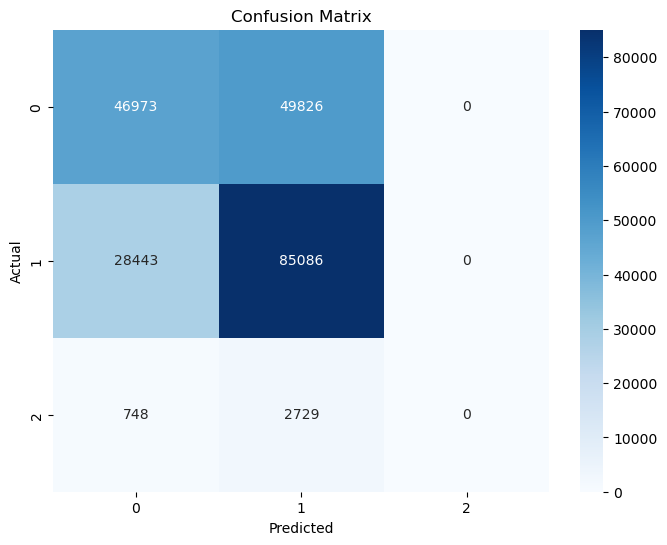

C:\Users\gstvluf\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gstvluf\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.62      0.49      0.54     96799
           1       0.62      0.75      0.68    113529
           2       0.00      0.00      0.00      3477

    accuracy                           0.62    213805
   macro avg       0.41      0.41      0.41    213805
weighted avg       0.61      0.62      0.61    213805



C:\Users\gstvluf\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Cria uma instância do algorítmo de Regressão Logística
lrmodel = LogisticRegression()

# Treina o modelo com a base de treinamento
lrmodel_treinado = lrmodel.fit(X_train, y_train)

# Realiza a predição dos valores de teste
y_predict = lrmodel_treinado.predict(X_test)

avaliar_model(y_test, y_predict)

C:\Users\gstvluf\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


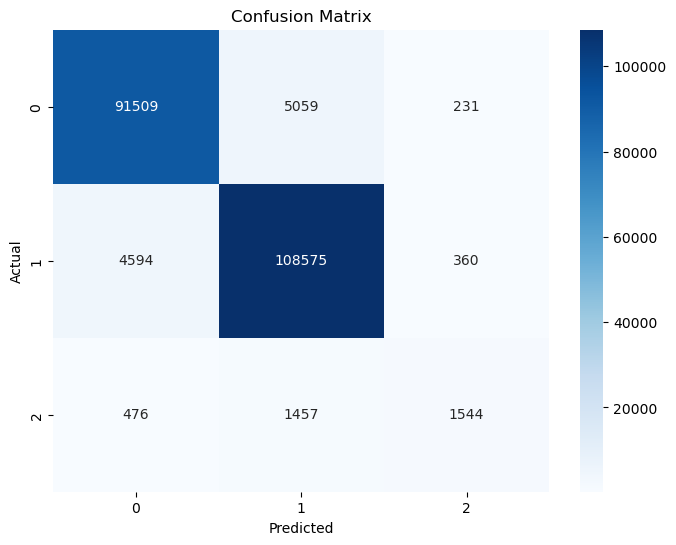

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     96799
           1       0.94      0.96      0.95    113529
           2       0.72      0.44      0.55      3477

    accuracy                           0.94    213805
   macro avg       0.87      0.78      0.82    213805
weighted avg       0.94      0.94      0.94    213805



In [27]:
from sklearn.ensemble import RandomForestClassifier

# Cria uma instância do modelo
rdmf = RandomForestClassifier()
# Treina o modelo com a base de treinamento
rdmf.fit(X_train, y_train)

# Realiza a predição dos valores de teste
y_predict = rdmf.predict(X_test)

avaliar_model(y_test, y_predict)